TITLE - The impacts of cardiac disease-related risk factors and healthcare spending on rates of incidence and mortality of heart failure, ischemic heart disease and myocardial infarction across Canada.

AIM 1: This project aims to analyze whether or not amount spent on healthcare impacts rates of incidence and mortality of cardiac diseases in Canada.
To do so, data was collected on incidence and mortality rates in every province from the following website - https://health-infobase.canada.ca/ccdss/data-tool/
We decided to narrow down our analysis on 3 particular diseases - heart failure, ischemic heart disease and myocardial infarction.
Furthermore, data was collected on healthcare spending in each province from the following website - https://www.cihi.ca/en/national-health-expenditure-trends
We decided to narrow down our analysis on the time period from 2015-2022 in order to have the same time period for all datasets.

AIM 2: The same datasets for incidence and mortality rates were used to see if risk factors specifically associated with cardiac diseases have an impact on rates of incidence and mortality.
The data on risk factors was collected from the following website -

All of the cleaned data was stored in a SQL database with the use of pgAdmin4.

VISUALIZATIONS: 1. Maps were created using Flask backend API routes and leaflet libraries, displaying the incidence and mortality rates across Canada in a visual way. This helps us get a general sense of the situation first.

2. Line and bar graphs were created using python libraries previously covered in class such as pandas and matplotlib. These displayed the data in a way where we have access to the concrete numbers to get a more precise sense of the situation.

3. Linear regressions were created using python libraries not covered in class torch and sklearn. The correlation between incidence rates and healthcare spending was first assessed, then the correlation between mortality rates and healthcare spending was assessed, then the correlation between incidence rates and risk factors was assessed and finally the correlation between mortality rates and risk factors was assessed.

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install numpy<2

zsh:1: no such file or directory: 2


PART 1 - DATA CLEANING
Datasets collected from the links above are cleaned to get final versions. The original ones are found in the "Resources" folder and the cleaned ones are found in the "Cleaned Resources" folder.

In [4]:
#Load the csv files pertaining to the incidence of the different cardiac diseases
incidence_failure_path = Path("../Resources/incidence_rates/failure_incidence.csv") 
incidence_failure = pd.read_csv(incidence_failure_path, encoding='ISO-8859-1',skiprows=1 )

incidence_ischemic_path = Path("../Resources/incidence_rates/ischemic_incidence.csv") 
incidence_ischemic = pd.read_csv(incidence_ischemic_path, encoding='ISO-8859-1', skiprows=1)

incidence_myocardial_path = Path("../Resources/incidence_rates/myocardial_incidence.csv") 
incidence_myocardial = pd.read_csv(incidence_myocardial_path, encoding='ISO-8859-1',skiprows=1)


In [5]:
#Load the csv files pertaining to the deaths caused by the different cardiac diseases
mortality_failure_path = Path("../Resources/mortality_rates/failure_mortality.csv") 
mortality_failure = pd.read_csv(mortality_failure_path, encoding='ISO-8859-1', skiprows=1)

mortality_ischemic_path = Path("../Resources/mortality_rates/ischemic_mortality.csv") 
mortality_ischemic = pd.read_csv(mortality_ischemic_path, encoding='ISO-8859-1', skiprows=1)

mortality_myocardial_path = Path("../Resources/mortality_rates/myocardial_mortality.csv") 
mortality_myocardial = pd.read_csv(mortality_myocardial_path, encoding='ISO-8859-1', skiprows=1)

In [6]:
#Load the csv files pertaining to healthcare spending
healthcare_spending_path = Path("../Resources/healthcare_summary.csv") 
healthcare_spending = pd.read_csv(healthcare_spending_path, encoding='ISO-8859-1', skiprows=4)

In [7]:
#Load the csv files pertaining to the risk factors associated with cardiac diseases
alberta_risks_path = Path("../Resources/risk_factors/alberta_risks.csv")
alberta_risks = pd.read_csv(alberta_risks_path, encoding='ISO-8859-1', on_bad_lines='skip', skiprows=8)

bc_risks_path = Path("../Resources/risk_factors/bc_risks.csv")
bc_risks = pd.read_csv(bc_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

manitoba_risks_path = Path("../Resources/risk_factors/manitoba_risks.csv")
manitoba_risks = pd.read_csv(manitoba_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

nb_risks_path = Path("../Resources/risk_factors/nb_risks.csv")
nb_risks = pd.read_csv(nb_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

nfl_risks_path = Path("../Resources/risk_factors/nfl_risks.csv")
nfl_risks = pd.read_csv(nfl_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

ns_risks_path = Path("../Resources/risk_factors/ns_risks.csv")
ns_risks = pd.read_csv(ns_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

ontario_risks_path = Path("../Resources/risk_factors/ontario_risks.csv")
ontario_risks = pd.read_csv(ontario_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

pei_risks_path = Path("../Resources/risk_factors/pei_risks.csv")
pei_risks = pd.read_csv(pei_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

quebec_risks_path = Path("../Resources/risk_factors/quebec_risks.csv")
quebec_risks = pd.read_csv(quebec_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')

sask_risks_path = Path("../Resources/risk_factors/sask_risks.csv")
sask_risks = pd.read_csv(sask_risks_path, encoding='ISO-8859-1', on_bad_lines='skip')



In [8]:
#Load the dataset pertaining to incidence of heart failure
incidence_failure.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,40+,20002001,731.0,2.30,726.0,735.0,0.32,100690.0,13779180.0,NaN
1,Canada,Females,Total,40+,20002001,716.0,3.16,710.0,723.0,0.44,51370.0,7171470.0,NaN
2,Canada,Males,Total,40+,20002001,746.0,3.36,740.0,753.0,0.45,49315.0,6607705.0,NaN
3,Canada,Both sexes,Total,40+,20012002,687.0,2.20,683.0,691.0,0.32,97115.0,14138230.0,NaN
4,Canada,Females,Total,40+,20012002,675.0,3.03,669.0,680.0,0.45,49575.0,7349705.0,NaN


In [9]:
#Load the names of the columns to ensure that we are dealing with the correct ones
incidence_failure.columns

Index(['Geography', 'Sex', 'Age group type', 'Age group', 'Fiscal year',
       'Rate (per 100,000)', 'Standard Error', 'Lower 95%_CI', 'Upper 95%_CI',
       'Rate CV (%)', 'Counts', 'Population', 'Unnamed: 12'],
      dtype='object')

In [10]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Counts", 'Rate (per 100,000)']
incidence_failure_cleaned = incidence_failure[columns_kept]



incidence_failure_cleaned.head()



,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)"
0,Canada,Both sexes,20002001,100690.0,731.0
1,Canada,Females,20002001,51370.0,716.0
2,Canada,Males,20002001,49315.0,746.0
3,Canada,Both sexes,20012002,97115.0,687.0
4,Canada,Females,20012002,49575.0,675.0


In [11]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_failure_cleaned['Fiscal year'] = incidence_failure_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_failure_cleaned.fillna(value={'Counts': 0, 'Rate (per 100,000)':0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_failure_final = incidence_failure_cleaned[incidence_failure_cleaned["Sex"] == "Both sexes"]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_failure_final = incidence_failure_final[incidence_failure_final['Fiscal year'] >= '2015-2016']

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/4046727098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_failure_cleaned['Fiscal year'] = incidence_failure_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/4046727098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_failure_cleaned.fillna(value={'Counts': 0, 'Rate (per 100,000)':0}, inplace=True)


In [12]:
# Reset index and drop the old index
incidence_failure_final.reset_index(drop=True, inplace=True)
#Drop all rows below the last row of data of interest
incidence_failure_final = incidence_failure_final.iloc[:963]

incidence_failure_final

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)"
0,Canada,Both sexes,2015-2016,101185.0,544.0
1,Canada,Both sexes,2016-2017,101655.0,538.0
2,Canada,Both sexes,2017-2018,106765.0,557.0
3,Canada,Both sexes,2018-2019,109105.0,560.0
4,Canada,Both sexes,2019-2020,111030.0,560.0
...,...,...,...,...,...
107,Nunavut,Both sexes,2018-2019,60.0,512.0
108,Nunavut,Both sexes,2019-2020,55.0,468.0
109,Nunavut,Both sexes,2020-2021*,45.0,381.0
110,Nunavut,Both sexes,2021-2022*,60.0,496.0


In [13]:
#Load the dataset pertaining to incidence of ischemic heart disease
incidence_ischemic.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,20+,20002001,991.0,2.12,986.0,995.0,0.21,217465.0,21952330.0,NaN
1,Canada,Females,Total,20+,20002001,886.0,2.80,880.0,891.0,0.32,100270.0,11318190.0,NaN
2,Canada,Males,Total,20+,20002001,1102.0,3.22,1096.0,1108.0,0.29,117190.0,10634135.0,NaN
3,Canada,Both sexes,Total,20+,20012002,921.0,2.04,917.0,925.0,0.22,204410.0,22186025.0,NaN
4,Canada,Females,Total,20+,20012002,827.0,2.69,822.0,833.0,0.33,94650.0,11438565.0,NaN


In [14]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Counts", 'Rate (per 100,000)']
incidence_ischemic_cleaned = incidence_ischemic[columns_kept]

incidence_ischemic_cleaned.head()

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)"
0,Canada,Both sexes,20002001,217465.0,991.0
1,Canada,Females,20002001,100270.0,886.0
2,Canada,Males,20002001,117190.0,1102.0
3,Canada,Both sexes,20012002,204410.0,921.0
4,Canada,Females,20012002,94650.0,827.0


In [15]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_ischemic_cleaned['Fiscal year'] = incidence_ischemic_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_ischemic_cleaned.fillna(value={'Counts': 0, 'Rate (per 100,000)':0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_ischemic_final = incidence_ischemic_cleaned[incidence_ischemic_cleaned["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
incidence_ischemic_final = incidence_ischemic_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_ischemic_final = incidence_ischemic_final[incidence_ischemic_final['Fiscal year'] >= '2015-2016']

incidence_ischemic_final

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/2335787293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_ischemic_cleaned['Fiscal year'] = incidence_ischemic_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/2335787293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_ischemic_cleaned.fillna(value={'Counts': 0, 'Rate (per 100,000)':0}, inplace=True)


,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)"
45,Canada,Both sexes,2015-2016,159230.0,590.0
48,Canada,Both sexes,2016-2017,163110.0,596.0
51,Canada,Both sexes,2017-2018,163290.0,589.0
54,Canada,Both sexes,2018-2019,162255.0,576.0
57,Canada,Both sexes,2019-2020,166545.0,580.0
...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,65.0,266.0
954,Nunavut,Both sexes,2019-2020,70.0,288.0
957,Nunavut,Both sexes,2020-2021*,50.0,205.0
960,Nunavut,Both sexes,2021-2022*,80.0,324.0


In [16]:
#Load the dataset pertaining to incidence of myocardial infarction
incidence_myocardial

,Geography,Sex,Age group type,Age group,Fiscal year,"Rate (per 100,000)",Standard Error,Lower 95%_CI,Upper 95%_CI,Rate CV (%),Counts,Population,Unnamed: 12
0,Canada,Both sexes,Total,20+,20002001,266.0,1.08,264.0,269.0,0.40,61410.0,23044910.0,NaN
1,Canada,Females,Total,20+,20002001,194.0,1.28,192.0,197.0,0.66,22935.0,11821340.0,NaN
2,Canada,Males,Total,20+,20002001,343.0,1.75,339.0,346.0,0.51,38470.0,11223560.0,NaN
3,Canada,Both sexes,Total,20+,20012002,266.0,1.07,264.0,268.0,0.40,62230.0,23371450.0,NaN
4,Canada,Females,Total,20+,20012002,197.0,1.28,195.0,200.0,0.65,23620.0,11989080.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,Canadian Chronic Disease Surveillance System 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,https://health-infobase.canada.ca/CCDSS/data-t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,https://sante-infobase.canada.ca/SCSMC/outil-d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Drop all unnecessary columns
columns_kept = ["Geography", "Sex", "Fiscal year", "Rate (per 100,000)", "Counts"]
incidence_myocardial_cleaned = incidence_myocardial[columns_kept]

incidence_myocardial_cleaned.head()

,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts
0,Canada,Both sexes,20002001,266.0,61410.0
1,Canada,Females,20002001,194.0,22935.0
2,Canada,Males,20002001,343.0,38470.0
3,Canada,Both sexes,20012002,266.0,62230.0
4,Canada,Females,20012002,197.0,23620.0


In [18]:
# Replace non-ASCII characters in 'Fiscal year'
incidence_myocardial_cleaned['Fiscal year'] = incidence_myocardial_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
incidence_myocardial_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
incidence_myocardial_final = incidence_myocardial_cleaned[incidence_myocardial_cleaned["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
incidence_myocardial_final = incidence_myocardial_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
incidence_myocardial_final = incidence_myocardial_final[incidence_myocardial_final['Fiscal year'] >= '2015-2016']

incidence_myocardial_final

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/6630107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_myocardial_cleaned['Fiscal year'] = incidence_myocardial_cleaned['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)
/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/6630107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidence_myocardial_cleaned.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0}, inplace=True)


,Geography,Sex,Fiscal year,"Rate (per 100,000)",Counts
45,Canada,Both sexes,2015-2016,223.0,63975.0
48,Canada,Both sexes,2016-2017,227.0,66135.0
51,Canada,Both sexes,2017-2018,225.0,66565.0
54,Canada,Both sexes,2018-2019,224.0,67235.0
57,Canada,Both sexes,2019-2020,214.0,65210.0
...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,120.0,30.0
954,Nunavut,Both sexes,2019-2020,101.0,25.0
957,Nunavut,Both sexes,2020-2021*,80.0,20.0
960,Nunavut,Both sexes,2021-2022*,159.0,40.0


In [19]:
#Load the dataset pertaining to deaths caused by heart failure
mortality_failure

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,40+,20002001,1137.0,3.13,1131.0,1144.0,0.27,...,83.07,7630.0,7960.0,1.07,65940.0,458165.0,6.85,6.70,7.00,NaN
1,Canada,Females,Total,40+,20002001,934.0,3.66,927.0,941.0,0.39,...,133.24,7151.0,7685.0,1.80,33625.0,238715.0,7.93,7.65,8.22,NaN
2,Canada,Males,Total,40+,20002001,1417.0,5.70,1406.0,1429.0,0.40,...,106.57,8042.0,8468.0,1.29,32315.0,219455.0,5.82,5.67,5.98,NaN
3,Canada,Both sexes,Total,40+,20012002,1118.0,3.06,1112.0,1124.0,0.27,...,82.23,7483.0,7810.0,1.08,68175.0,488010.0,6.83,6.69,6.98,NaN
4,Canada,Females,Total,40+,20012002,923.0,3.59,916.0,930.0,0.39,...,130.74,6985.0,7509.0,1.81,34830.0,253965.0,7.84,7.56,8.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Source:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,Canadian Chronic Disease Surveillance System 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,https://health-infobase.canada.ca/CCDSS/data-t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
985,https://sante-infobase.canada.ca/SCSMC/outil-d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Load the columns to ensure we are dealing with the correct ones
mortality_failure.columns

Index(['Geography', 'Sex', 'Age group type', 'Age group', 'Fiscal year',
       'Mortality without the condition (per 100,000)',
       'Standard Error of mortality without the condition',
       'Lower 95%_CI of mortality without the condition',
       'Upper 95%_CI of mortality without the condition',
       'Rate CV (%) of mortality without the condition',
       'Counts of mortality without the condition',
       'Population of mortality without the condition',
       'Mortality with the condition (per 100,000)',
       'Standard Error of mortality with the condition',
       'Lower 95%_CI of mortality with the condition',
       'Upper 95%_CI of mortality with the condition',
       'Rate CV (%) of mortality with the condition',
       'Counts of mortality with the condition',
       'Population of mortality with the condition', 'Rate ratio',
       'Lower 95%_CI of rate ratio', 'Upper 95%_CI of rate ratio',
       'Unnamed: 22'],
      dtype='object')

In [21]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition', 'Mortality with the condition (per 100,000)', 'Population of mortality with the condition']
mortality_failure_cleaned = mortality_failure[columns_kept]

mortality_failure_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,"Mortality with the condition (per 100,000)",Population of mortality with the condition
0,Canada,Both sexes,20002001,65940.0,7792.0,458165.0
1,Canada,Females,20002001,33625.0,7410.0,238715.0
2,Canada,Males,20002001,32315.0,8249.0,219455.0
3,Canada,Both sexes,20012002,68175.0,7643.0,488010.0
4,Canada,Females,20012002,34830.0,7239.0,253965.0


In [22]:
#Rename the necessary columns
mortality_failure_renamed = mortality_failure_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population", 'Mortality with the condition (per 100,000)': 'Rate (per 100,000)'})

mortality_failure_renamed.head()

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)",Population
0,Canada,Both sexes,20002001,65940.0,7792.0,458165.0
1,Canada,Females,20002001,33625.0,7410.0,238715.0
2,Canada,Males,20002001,32315.0,8249.0,219455.0
3,Canada,Both sexes,20012002,68175.0,7643.0,488010.0
4,Canada,Females,20012002,34830.0,7239.0,253965.0


In [23]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_failure_renamed['Fiscal year'] = mortality_failure_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_failure_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population':0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_failure_final = mortality_failure_renamed[mortality_failure_renamed["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
mortality_failure_final = mortality_failure_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_failure_final = mortality_failure_final[mortality_failure_final['Fiscal year'] >= '2015-2016']
mortality_failure_final

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)",Population
45,Canada,Both sexes,2015-2016,82885.0,5588.0,713795.0
48,Canada,Both sexes,2016-2017,86790.0,5586.0,730955.0
51,Canada,Both sexes,2017-2018,89245.0,5616.0,749085.0
54,Canada,Both sexes,2018-2019,89360.0,5561.0,767380.0
57,Canada,Both sexes,2019-2020,90970.0,5526.0,787340.0
...,...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,40.0,8145.0,430.0
954,Nunavut,Both sexes,2019-2020,25.0,5669.0,425.0
957,Nunavut,Both sexes,2020-2021*,25.0,4002.0,435.0
960,Nunavut,Both sexes,2021-2022*,25.0,4694.0,455.0


In [24]:
#Load the dataset pertaining to deaths caused by ischemic heart disease
mortality_ischemic.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,20+,20002001,763.0,2.21,758.0,767.0,0.29,...,36.18,2188.0,2338.0,1.60,84575.0,1494930.0,2.96,2.87,3.06,NaN
1,Canada,Females,Total,20+,20002001,636.0,2.57,631.0,641.0,0.40,...,56.77,1929.0,2172.0,2.78,39480.0,664390.0,3.21,3.04,3.39,NaN
2,Canada,Males,Total,20+,20002001,952.0,4.13,944.0,960.0,0.43,...,47.12,2386.0,2586.0,1.90,45090.0,830535.0,2.60,2.51,2.70,NaN
3,Canada,Both sexes,Total,20+,20012002,747.0,2.17,743.0,751.0,0.29,...,31.81,2139.0,2271.0,1.45,89205.0,1610400.0,2.95,2.86,3.03,NaN
4,Canada,Females,Total,20+,20012002,626.0,2.53,621.0,631.0,0.40,...,45.18,1856.0,2051.0,2.32,41870.0,717705.0,3.11,2.97,3.25,NaN


In [25]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition','Mortality with the condition (per 100,000)', 'Population of mortality with the condition']
mortality_ischemic_cleaned = mortality_ischemic[columns_kept]

mortality_ischemic_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,"Mortality with the condition (per 100,000)",Population of mortality with the condition
0,Canada,Both sexes,20002001,84575.0,2258.0,1494930.0
1,Canada,Females,20002001,39480.0,2039.0,664390.0
2,Canada,Males,20002001,45090.0,2478.0,830535.0
3,Canada,Both sexes,20012002,89205.0,2201.0,1610400.0
4,Canada,Females,20012002,41870.0,1944.0,717705.0


In [26]:
#Rename the necessary columns
mortality_ischemic_renamed = mortality_ischemic_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population ", "Mortality with the condition (per 100,000)": "Rate (per 100,000)"})

mortality_ischemic_renamed.head()

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)",Population
0,Canada,Both sexes,20002001,84575.0,2258.0,1494930.0
1,Canada,Females,20002001,39480.0,2039.0,664390.0
2,Canada,Males,20002001,45090.0,2478.0,830535.0
3,Canada,Both sexes,20012002,89205.0,2201.0,1610400.0
4,Canada,Females,20012002,41870.0,1944.0,717705.0


In [27]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_ischemic_renamed['Fiscal year'] = mortality_ischemic_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_ischemic_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population':0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_ischemic_final = mortality_ischemic_renamed[mortality_ischemic_renamed["Sex"] == "Both sexes"]
#Drop all rows below the last row of data of interest
mortality_ischemic_final = mortality_ischemic_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_ischemic_final = mortality_ischemic_final[mortality_ischemic_final['Fiscal year'] >= '2015-2016']
mortality_ischemic_final

,Geography,Sex,Fiscal year,Counts,"Rate (per 100,000)",Population
45,Canada,Both sexes,2015-2016,114955.0,1675.0,2478700.0
48,Canada,Both sexes,2016-2017,119735.0,1697.0,2521690.0
51,Canada,Both sexes,2017-2018,123290.0,1735.0,2559125.0
54,Canada,Both sexes,2018-2019,121610.0,1658.0,2592965.0
57,Canada,Both sexes,2019-2020,123315.0,1635.0,2632580.0
...,...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,30.0,2871.0,760.0
954,Nunavut,Both sexes,2019-2020,30.0,1951.0,775.0
957,Nunavut,Both sexes,2020-2021*,0.0,0.0,NaN
960,Nunavut,Both sexes,2021-2022*,30.0,2733.0,805.0


In [28]:
#Load the dataset pertaining to deaths caused by myocardial infarction
mortality_myocardial.head()

,Geography,Sex,Age group type,Age group,Fiscal year,"Mortality without the condition (per 100,000)",Standard Error of mortality without the condition,Lower 95%_CI of mortality without the condition,Upper 95%_CI of mortality without the condition,Rate CV (%) of mortality without the condition,...,Standard Error of mortality with the condition,Lower 95%_CI of mortality with the condition,Upper 95%_CI of mortality with the condition,Rate CV (%) of mortality with the condition,Counts of mortality with the condition,Population of mortality with the condition,Rate ratio,Lower 95%_CI of rate ratio,Upper 95%_CI of rate ratio,Unnamed: 22
0,Canada,Both sexes,Total,20+,20002001,898.0,2.12,894.0,902.0,0.24,...,202.53,4132.0,5060.0,4.48,25090.0,246300.0,5.04,4.61,5.50,NaN
1,Canada,Females,Total,20+,20002001,736.0,2.48,731.0,741.0,0.34,...,865.20,4734.0,9028.0,13.70,11150.0,83915.0,8.58,6.56,11.23,NaN
2,Canada,Males,Total,20+,20002001,1123.0,3.84,1116.0,1131.0,0.34,...,167.73,3835.0,4671.0,4.03,13935.0,162385.0,3.70,3.42,4.01,NaN
3,Canada,Both sexes,Total,20+,20012002,882.0,2.07,878.0,886.0,0.23,...,199.70,4040.0,4933.0,4.52,27345.0,282785.0,5.01,4.59,5.48,NaN
4,Canada,Females,Total,20+,20012002,727.0,2.43,722.0,732.0,0.33,...,665.13,4431.0,8025.0,11.75,11990.0,96160.0,7.78,6.18,9.80,NaN


In [29]:
#Drop all unnecessary columns
columns_kept = ['Geography', 'Sex', 'Fiscal year', 'Counts of mortality with the condition', 'Population of mortality with the condition', 'Mortality with the condition (per 100,000)']
mortality_myocardial_cleaned = mortality_myocardial[columns_kept]

mortality_myocardial_cleaned.head()

,Geography,Sex,Fiscal year,Counts of mortality with the condition,Population of mortality with the condition,"Mortality with the condition (per 100,000)"
0,Canada,Both sexes,20002001,25090.0,246300.0,4520.0
1,Canada,Females,20002001,11150.0,83915.0,6315.0
2,Canada,Males,20002001,13935.0,162385.0,4157.0
3,Canada,Both sexes,20012002,27345.0,282785.0,4422.0
4,Canada,Females,20012002,11990.0,96160.0,5659.0


In [30]:
#Rename the necessary columns
mortality_myocardial_renamed = mortality_myocardial_cleaned.rename(columns={"Counts of mortality with the condition": "Counts", "Population of mortality with the condition": "Population", "Mortality with the condition (per 100,000)": "Rate (per 100,000)"})

mortality_myocardial_renamed.head()

,Geography,Sex,Fiscal year,Counts,Population,"Rate (per 100,000)"
0,Canada,Both sexes,20002001,25090.0,246300.0,4520.0
1,Canada,Females,20002001,11150.0,83915.0,6315.0
2,Canada,Males,20002001,13935.0,162385.0,4157.0
3,Canada,Both sexes,20012002,27345.0,282785.0,4422.0
4,Canada,Females,20012002,11990.0,96160.0,5659.0


In [31]:
# Replace non-ASCII characters in 'Fiscal year'
mortality_myocardial_renamed['Fiscal year'] = mortality_myocardial_renamed['Fiscal year'].str.replace(r'[^\x00-\x7F]+', '-', regex=True)

# Fill missing values or handle incomplete rows
mortality_myocardial_renamed.fillna(value={'Rate (per 100,000)': 0, 'Counts': 0, 'Population': 0}, inplace=True)

#Drop all rows pertaining to a particular gender as the analysis is not gender-specific
mortality_myocardial_final = mortality_myocardial_renamed[mortality_myocardial_renamed["Sex"] == "Both sexes"]
#Filter to drop all rows below the last row of data of interest
mortality_myocardial_final = mortality_myocardial_final.iloc[:963]
#Filter the datasetb to begin in 2015 so that all datasets begin at the same date
mortality_myocardial_final = mortality_myocardial_final[mortality_myocardial_final['Fiscal year'] >= '2015-2016']
mortality_myocardial_final

,Geography,Sex,Fiscal year,Counts,Population,"Rate (per 100,000)"
45,Canada,Both sexes,2015-2016,43490.0,638010.0,2770.0
48,Canada,Both sexes,2016-2017,45420.0,659380.0,2810.0
51,Canada,Both sexes,2017-2018,47665.0,679025.0,3205.0
54,Canada,Both sexes,2018-2019,47740.0,697245.0,2856.0
57,Canada,Both sexes,2019-2020,47860.0,713335.0,2607.0
...,...,...,...,...,...,...
951,Nunavut,Both sexes,2018-2019,0.0,0.0,0.0
954,Nunavut,Both sexes,2019-2020,0.0,0.0,0.0
957,Nunavut,Both sexes,2020-2021*,0.0,0.0,0.0
960,Nunavut,Both sexes,2021-2022*,0.0,0.0,0.0


In [32]:
#Save all cleaned datasets as csv files
incidence_failure_path = "incidence_failure_final.csv"
incidence_failure_final.to_csv(incidence_failure_path,index=False)

incidence_ischemic_path = "incidence_ischemic_final.csv"
incidence_ischemic_final.to_csv(incidence_ischemic_path,index=False)

incidence_myocardial_path = "incidence_myocardial_final.csv"
incidence_myocardial_final.to_csv(incidence_myocardial_path,index=False)

mortality_failure_path = "mortality_failure_final.csv"
mortality_failure_final.to_csv(mortality_failure_path,index=False)

mortality_ischemic_path = "mortality_ischemic_final.csv"
mortality_ischemic_final.to_csv(mortality_ischemic_path,index=False)

mortality_myocardial_path = "mortality_myocardial_final.csv"
mortality_myocardial_final.to_csv(mortality_myocardial_path,index=False)

In [34]:
#Load the healthcare spending dataset
healthcare_spending.head()

,Year,N.L.,P.E.I.,N.S.,N.B.,Que.,Ont.,Man.,Sask.,Alta.,B.C.,Y.T.,N.W.T.,Nun.,Canada
0,19741975,174.6,35.6,228.1,169.9,"2,141.7","2,767.2",315.3,259.8,571.6,743.7,5.4,12.8,,"7,425.9"
1,19751976,207.4,43.5,279.8,214.9,"2,661.1","3,268.9",397.2,316.2,736.0,989.7,6.4,16.1,,"9,137.1"
2,19761977,222.9,46.0,310.3,251.6,"3,076.3","3,727.0",466.7,380.0,836.7,"1,113.7",9.6,19.9,,"10,460.8"
3,19771978,237.0,51.7,342.7,278.4,"3,333.5","3,996.5",507.5,421.0,893.2,"1,219.6",10.1,24.6,,"11,315.8"
4,19781979,265.4,57.9,379.1,306.0,"3,771.3","4,307.0",530.7,454.1,"1,062.9","1,411.9",11.8,29.2,,"12,587.3"


In [35]:
#Filter for the dataset to start in the year 2000 as is the case in the other datasets
healthcare_spending_final = healthcare_spending[healthcare_spending['Year'] >= '2015']
healthcare_spending_final.reset_index(drop=True, inplace=True)

#Filter to ensure that the last row in the table is the last row of data of interest
healthcare_spending_final = healthcare_spending_final.iloc[:8]

healthcare_spending_final

,Year,N.L.,P.E.I.,N.S.,N.B.,Que.,Ont.,Man.,Sask.,Alta.,B.C.,Y.T.,N.W.T.,Nun.,Canada
0,20152016,"3,011.6",654.6,"4,295.7","3,245.2","33,690.0","55,820.6","6,184.1","5,415.1","20,063.6","19,436.3",268.8,479.7,451.8,"153,017.2"
1,20162017,"3,041.7",682.2,"4,294.7","3,276.9","32,987.5","56,960.4","6,211.0","5,607.6","20,895.5","20,319.2",346.3,541.1,469.1,"155,633.1"
2,20172018,"3,075.7",716.3,"4,459.5","3,366.2","35,338.0","59,051.4","6,380.7","5,686.5","21,709.6","20,979.6",377.8,492.3,529.2,"162,162.9"
3,20182019,"3,176.8",751.8,"4,612.5","3,448.4","37,339.8","61,546.9","6,459.3","5,624.6","22,372.9","21,961.0",343.3,547.0,562.5,"168,746.6"
4,20192020,"3,384.8",797.6,"4,880.7","3,540.6","39,516.4","63,935.2","6,659.2","5,987.7","22,762.5","23,435.7",355.6,542.2,621.9,"176,420.2"
5,20202021,"3,313.5",828.7,"5,375.7","3,690.0","49,318.8","74,644.7","7,382.3","6,304.1","24,330.0","26,782.2",387.6,583.3,645.2,"203,586.3"
6,20212022,"3,754.6",908.8,"5,778.3","4,043.2","51,734.1","78,371.2","7,595.5","6,640.6","25,243.0","29,260.7",410.2,617.4,605.6,"214,963.0"
7,20222023,"3,948.8",985.1,"6,425.1","4,384.0","50,935.8","80,253.0","7,973.5","6,776.3","26,069.5","30,385.0",429.6,637.9,643.2,"219,846.9"


In [36]:
#Rename abbreviated province names in the columns to align with the other datasets
healthcare_spending_final = healthcare_spending_final.rename(columns={
    'Year': 'Fiscal year',
    'N.L.': 'Newfoundland and Labrador',
    'P.E.I.': 'Prince Edward Island',
    ' N.S.': 'Nova Scotia',
    'N.B.': 'New Brunswick',
    'Que.': 'Quebec',
    ' Ont.': 'Ontario',
    'Man.': 'Manitoba',
    'Sask.': 'Saskatchewan',
    'Alta.': 'Alberta',
    'B.C.': 'British Columbia',
    'Y.T.': 'Yukon Territory',
    'N.W.T.': 'Northwest Territories',
    'Nun.': 'Nunavut'
})
healthcare_spending_final

,Fiscal year,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon Territory,Northwest Territories,Nunavut,Canada
0,20152016,"3,011.6",654.6,"4,295.7","3,245.2","33,690.0","55,820.6","6,184.1","5,415.1","20,063.6","19,436.3",268.8,479.7,451.8,"153,017.2"
1,20162017,"3,041.7",682.2,"4,294.7","3,276.9","32,987.5","56,960.4","6,211.0","5,607.6","20,895.5","20,319.2",346.3,541.1,469.1,"155,633.1"
2,20172018,"3,075.7",716.3,"4,459.5","3,366.2","35,338.0","59,051.4","6,380.7","5,686.5","21,709.6","20,979.6",377.8,492.3,529.2,"162,162.9"
3,20182019,"3,176.8",751.8,"4,612.5","3,448.4","37,339.8","61,546.9","6,459.3","5,624.6","22,372.9","21,961.0",343.3,547.0,562.5,"168,746.6"
4,20192020,"3,384.8",797.6,"4,880.7","3,540.6","39,516.4","63,935.2","6,659.2","5,987.7","22,762.5","23,435.7",355.6,542.2,621.9,"176,420.2"
5,20202021,"3,313.5",828.7,"5,375.7","3,690.0","49,318.8","74,644.7","7,382.3","6,304.1","24,330.0","26,782.2",387.6,583.3,645.2,"203,586.3"
6,20212022,"3,754.6",908.8,"5,778.3","4,043.2","51,734.1","78,371.2","7,595.5","6,640.6","25,243.0","29,260.7",410.2,617.4,605.6,"214,963.0"
7,20222023,"3,948.8",985.1,"6,425.1","4,384.0","50,935.8","80,253.0","7,973.5","6,776.3","26,069.5","30,385.0",429.6,637.9,643.2,"219,846.9"


In [37]:
#Save the cleaned healthcare spending dataset as a csv file
healthcare_spending_path = "healthcare_spending_final.csv"
healthcare_spending_final.to_csv(healthcare_spending_path,index=False)

PART 2 - DATA VISUALIZATION
Visualizations created using python libraries matplotlib and pandas allow us to display the data with values for a more in-depth analysis.
Visualizations created using python libraries not covered in class - torch and sklearn - to create the linear regressions.

2.1 - Line graphs for incidence rates and mortality rates of ischemic heart disease, heart failure and myocardial infarction. Data was subdivided into "high cases" and "low cases" for better visibility due to large differences in values across the provinces.
Graphs saved as images in the "Output" folder.

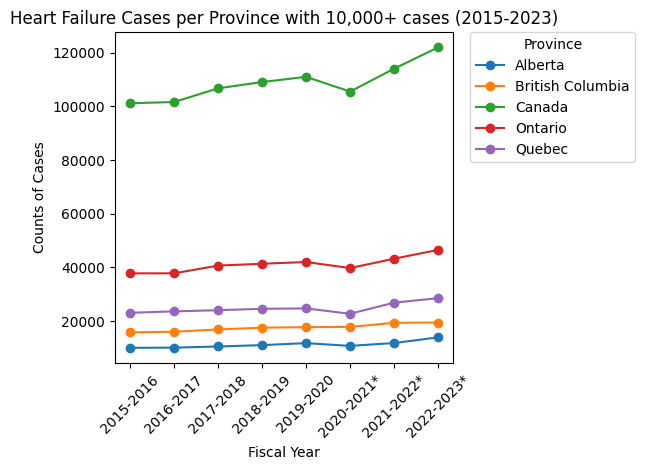

In [38]:
#Create a DataFrame for provinces with 10000 or more cases
failure_incidence_high_cases = incidence_failure_final[incidence_failure_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
failure_incidence_low_cases = incidence_failure_final[incidence_failure_final['Counts'] < 10000]

#Pivot the DataFrames
failure_incidence_df = failure_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
failure_incidence_df1 = failure_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
failure_incidence_df.plot(kind='line', marker='o')
plt.title('Heart Failure Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig(f"../Output/failure_incidence_morethan10k.png",bbox_inches='tight')
plt.show()


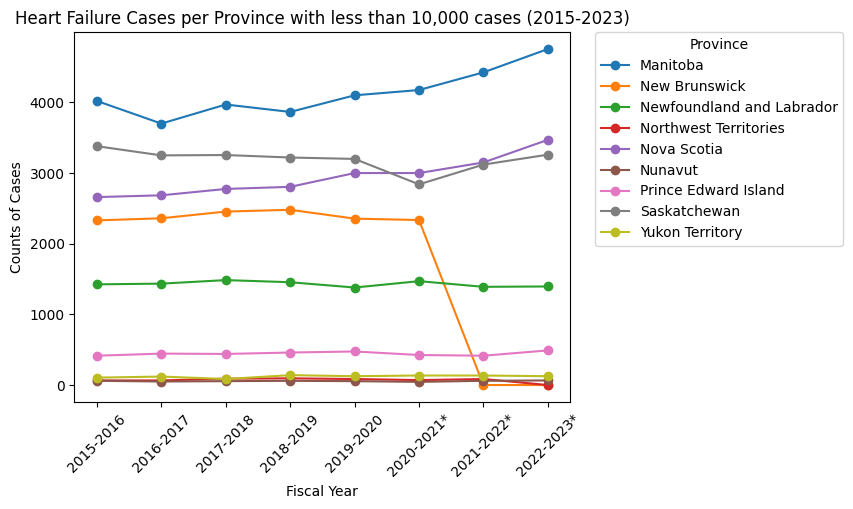

In [39]:
#Plot the data for low cases
failure_incidence_df1.plot(kind='line', marker='o')
plt.title('Heart Failure Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_incidence_lessthan10k.png", bbox_inches='tight')
plt.show()

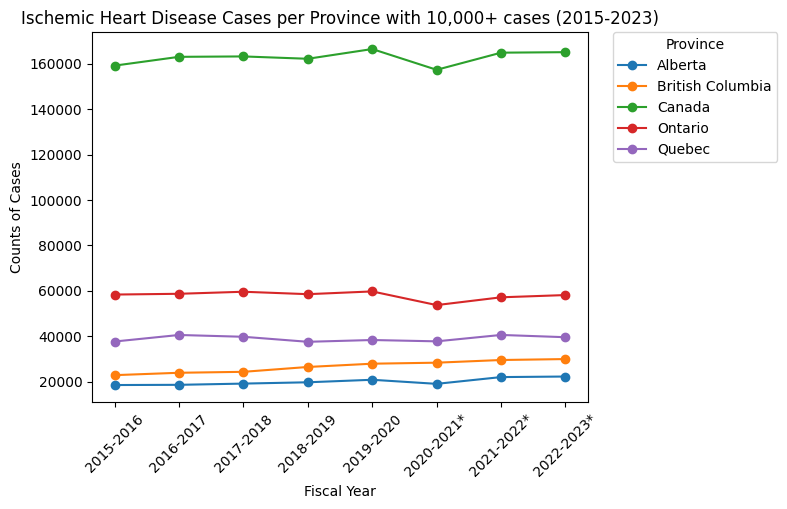

In [40]:
#Create a DataFrame for provinces with 10000 or more cases
ischemic_incidence_high_cases = incidence_ischemic_final[incidence_ischemic_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
ischemic_incidence_low_cases = incidence_ischemic_final[incidence_ischemic_final['Counts'] < 10000]
#Pivot the DataFrames
ischemic_incidence_df = ischemic_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
ischemic_incidence_df1 = ischemic_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
ischemic_incidence_df.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_incidence_morethan10k.png", bbox_inches='tight')
plt.show()

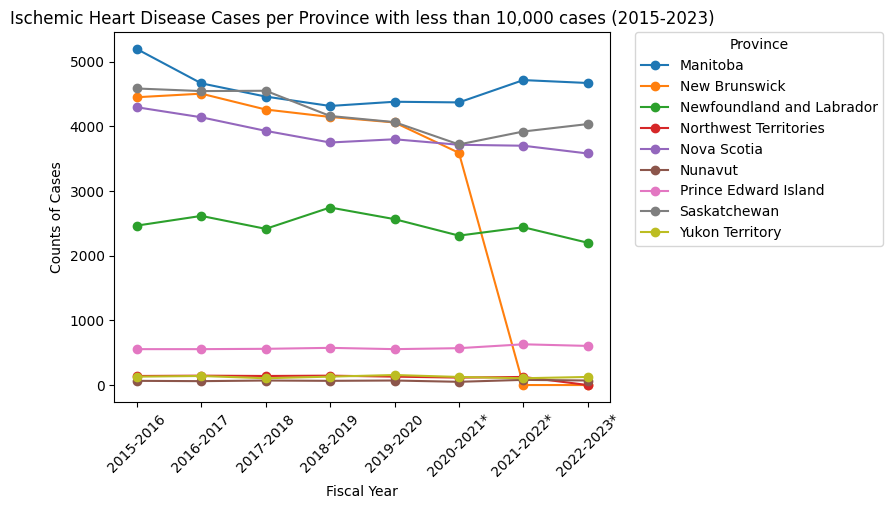

In [41]:
#Plot the data for low cases
ischemic_incidence_df1.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_incidence_lessthan10k.png", bbox_inches='tight')
plt.show()

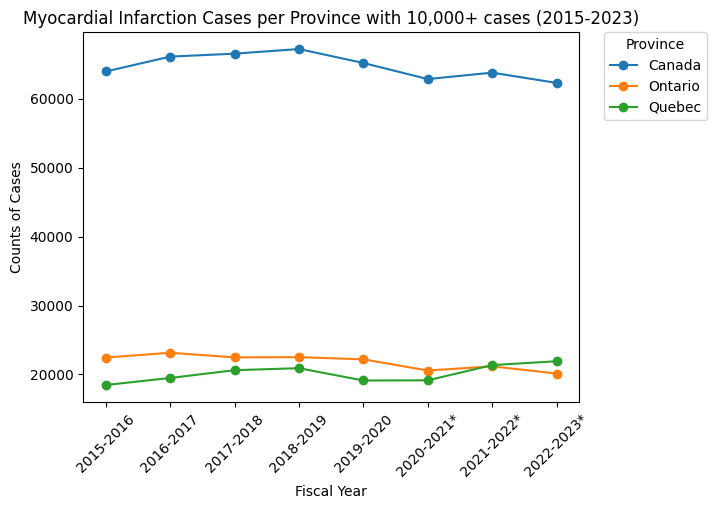

In [42]:
#Create a DataFrame for provinces with 10000 or more cases
myocardial_incidence_high_cases = incidence_myocardial_final[incidence_myocardial_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
myocardial_incidence_low_cases = incidence_myocardial_final[incidence_myocardial_final['Counts'] < 10000]

#Pivot the DataFrames
myocardial_incidence_df = myocardial_incidence_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
myocardial_incidence_df1 = myocardial_incidence_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
myocardial_incidence_df.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Cases per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_incidence_morethan10k.png", bbox_inches='tight')
plt.show()

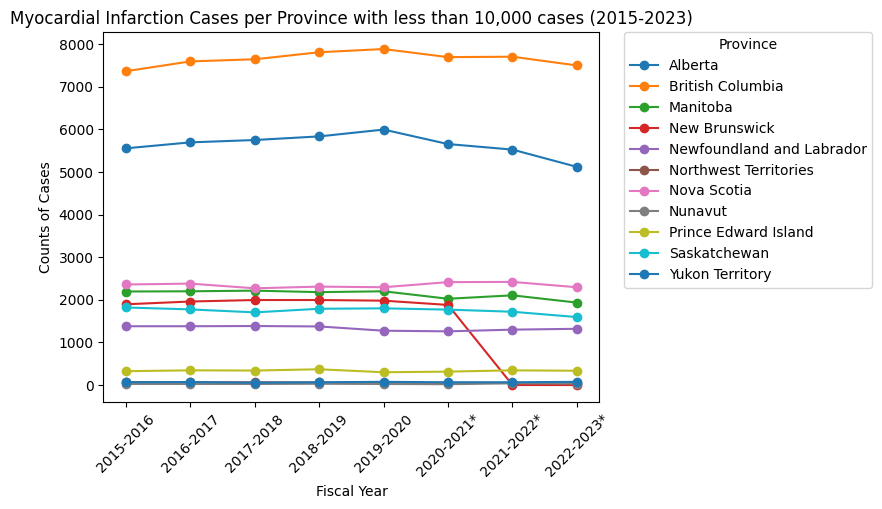

In [43]:
#Plot the data for low cases
myocardial_incidence_df1.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Cases per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Cases')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_incidence_lessthan10k.png", bbox_inches='tight')
plt.show()

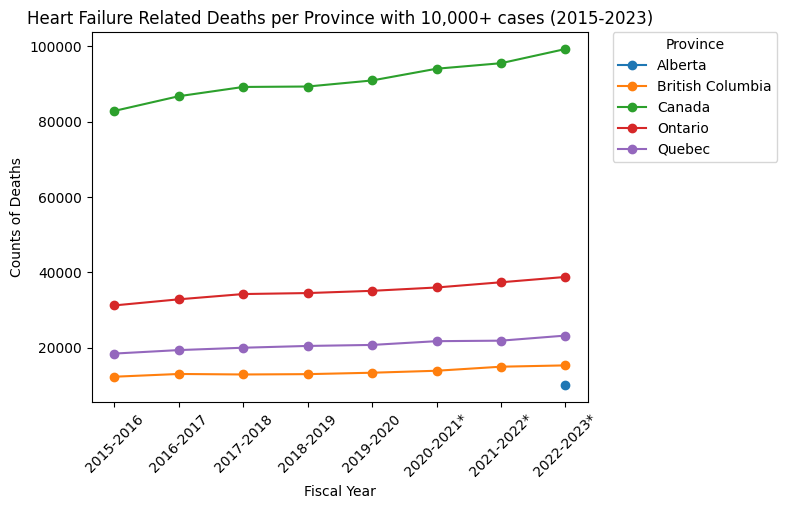

In [44]:
#Create a DataFrame for provinces with 10000 or more cases
failure_mortality_high_cases = mortality_failure_final[mortality_failure_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
failure_mortality_low_cases = mortality_failure_final[mortality_failure_final['Counts'] < 10000]

#Pivot the DataFrames
failure_mortality_df = failure_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
failure_mortality_df1 = failure_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
failure_mortality_df.plot(kind='line', marker='o')
plt.title('Heart Failure Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_mortality_morethan10k.png",bbox_inches='tight')
plt.show()

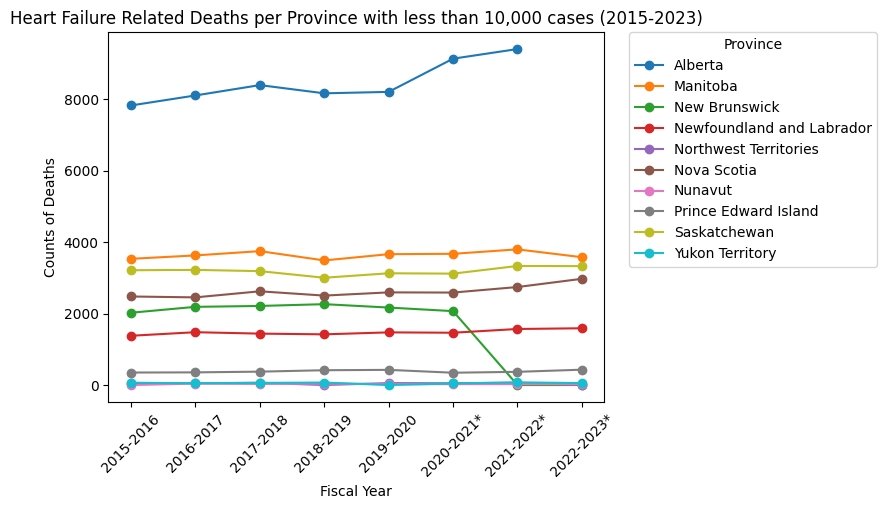

In [45]:
#Plot the data for low cases
failure_mortality_df1.plot(kind='line', marker='o')
plt.title('Heart Failure Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/failure_mortality_lessthan10k.png",bbox_inches='tight')
plt.show()

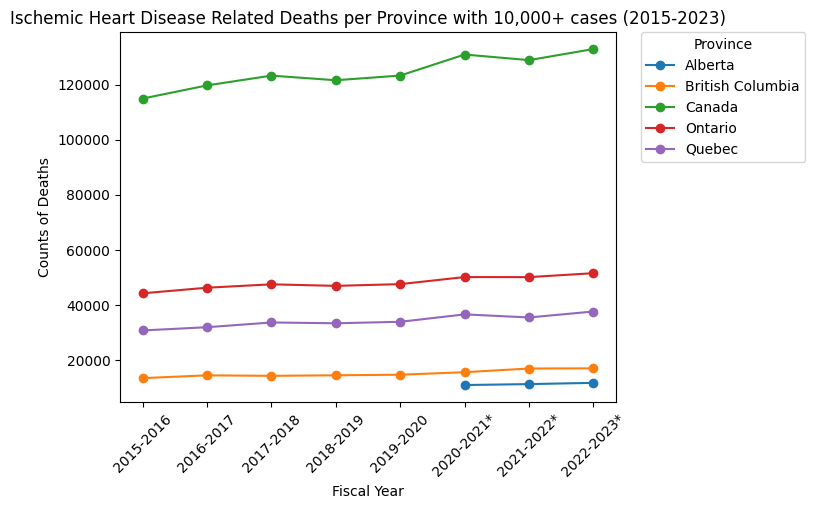

In [46]:
#Create a DataFrame for provinces with 10000 or more cases
ischemic_mortality_high_cases = mortality_ischemic_final[mortality_ischemic_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
ischemic_mortality_low_cases = mortality_ischemic_final[mortality_ischemic_final['Counts'] < 10000]

#Pivot the DataFrames
ischemic_mortality_df = ischemic_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
ischemic_mortality_df1 = ischemic_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
ischemic_mortality_df.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_mortality_morethan10k.png",bbox_inches='tight')
plt.show()

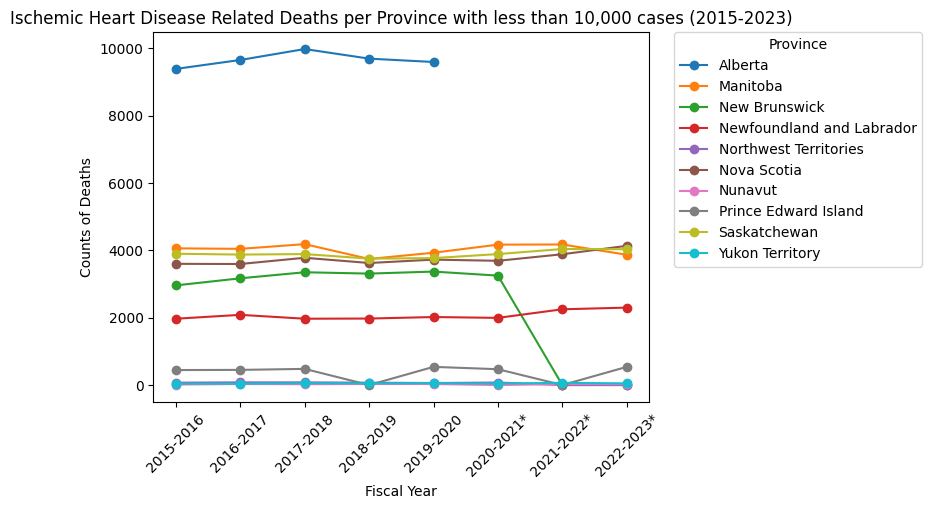

In [47]:
#Plot the data for low cases
ischemic_mortality_df1.plot(kind='line', marker='o')
plt.title('Ischemic Heart Disease Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/ischemic_mortality_lessthan10k.png",bbox_inches='tight')
plt.show()

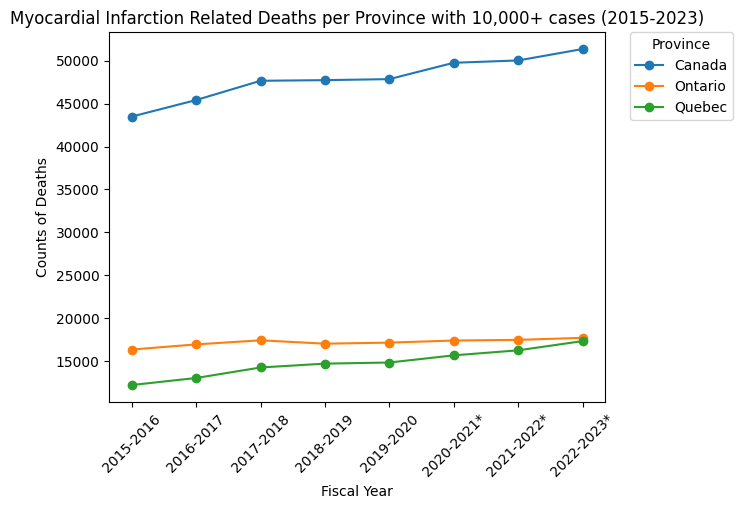

In [48]:
#Create a DataFrame for provinces with 10000 or more cases
myocardial_mortality_high_cases = mortality_myocardial_final[mortality_myocardial_final['Counts'] >= 10000]
#Create a DataFrame for provinces with less than 10000 cases
myocardial_mortality_low_cases = mortality_myocardial_final[mortality_myocardial_final['Counts'] < 10000]

#Pivot the DataFrames
myocardial_mortality_df = myocardial_mortality_high_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')
myocardial_mortality_df1 = myocardial_mortality_low_cases.pivot(index='Fiscal year', columns='Geography', values='Counts')

#Plot the data for high cases
myocardial_mortality_df.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Related Deaths per Province with 10,000+ cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_mortality_morethan10k.png",bbox_inches='tight')
plt.show()

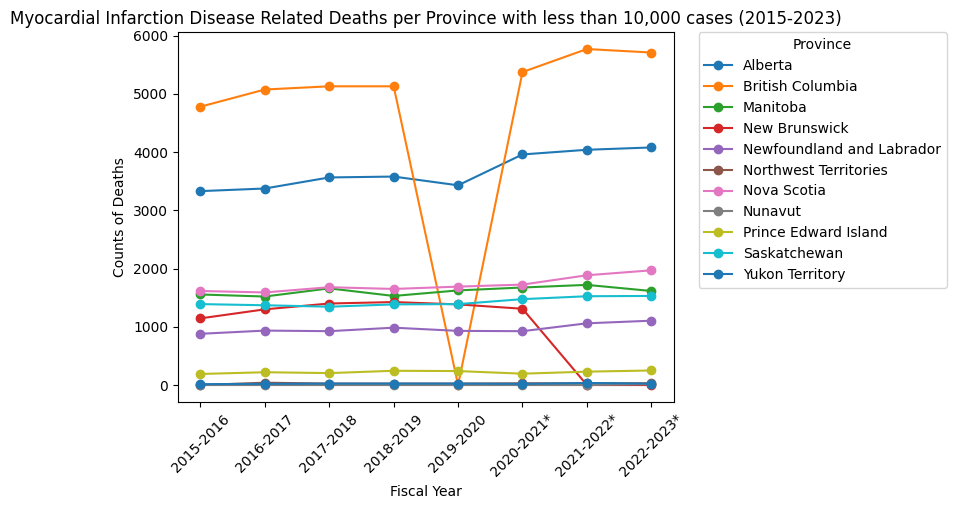

In [49]:
#Plot the data for low cases
myocardial_mortality_df1.plot(kind='line', marker='o')
plt.title('Myocardial Infarction Disease Related Deaths per Province with less than 10,000 cases (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Counts of Deaths')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/myocardial_mortality_lessthan10k.png",bbox_inches='tight')
plt.show()

2.2 - Line graphs for healthcare spending across the provinces.
Data was split into two batches for better visualization given the stark differences across the provinces. Graphs are saved as images in the "Output" folder.

In [50]:
#Remove commas and convert to numeric the values of spending for certain provinces
columns_to_convert = healthcare_spending_final.columns[1:]

for col in columns_to_convert:
    healthcare_spending_final[col] = healthcare_spending_final[col].replace(',', '', regex=True).astype(float)

In [51]:
#Reshape the dataset to allow for merging and analysis with other datasets
healthcare_long = healthcare_spending_final.melt(id_vars=['Fiscal year'], 
                                               var_name='Geography', 
                                               value_name='spending')
healthcare_long

,Fiscal year,Geography,spending
0,20152016,Newfoundland and Labrador,3011.6
1,20162017,Newfoundland and Labrador,3041.7
2,20172018,Newfoundland and Labrador,3075.7
3,20182019,Newfoundland and Labrador,3176.8
4,20192020,Newfoundland and Labrador,3384.8
...,...,...,...
107,20182019,Canada,168746.6
108,20192020,Canada,176420.2
109,20202021,Canada,203586.3
110,20212022,Canada,214963.0


/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/828642711.py:16: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.savefig(f"../Output/healthcare_spending_morethan25k.png", bbox_inches='tight')
/Users/ahmedmansour/Desktop/datacourse/git_branch/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


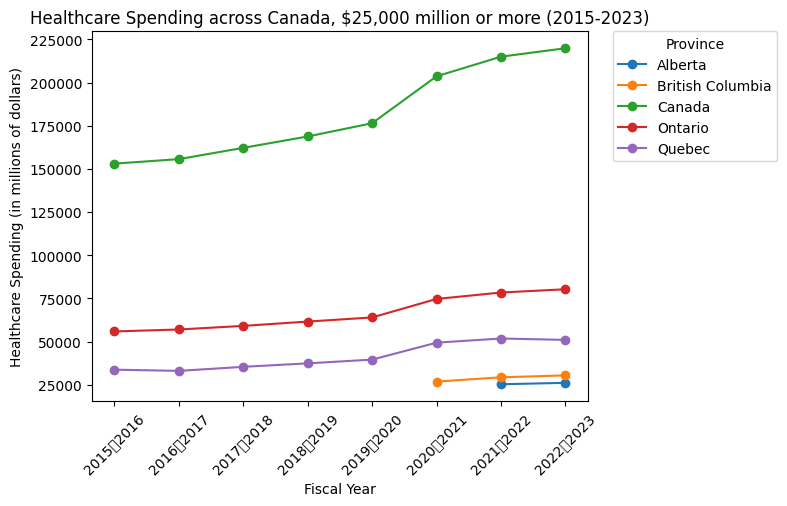

In [52]:
#Create a DataFrame for provinces with 25000 million $ or more cases
healthcare_high_spending = healthcare_long[healthcare_long['spending'] >= 25000]
#Create a DataFrame for provinces with less than 25000 million $ cases
healthcare_low_spending = healthcare_long[healthcare_long['spending'] < 25000]
#Pivot the DataFrames
spending_df = healthcare_high_spending.pivot(index='Fiscal year', columns='Geography', values='spending')
spending_df1 = healthcare_low_spending.pivot(index='Fiscal year', columns='Geography', values='spending')

#Plot the data for high spending
spending_df.plot(kind='line', marker='o')
plt.title('Healthcare Spending across Canada, $25,000 million or more (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Healthcare Spending (in millions of dollars)')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/healthcare_spending_morethan25k.png", bbox_inches='tight')
plt.show()

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_6953/3999056461.py:8: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  plt.savefig(f"../Output/healthcare_spending_lessthan25k.png",bbox_inches='tight')
/Users/ahmedmansour/Desktop/datacourse/git_branch/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


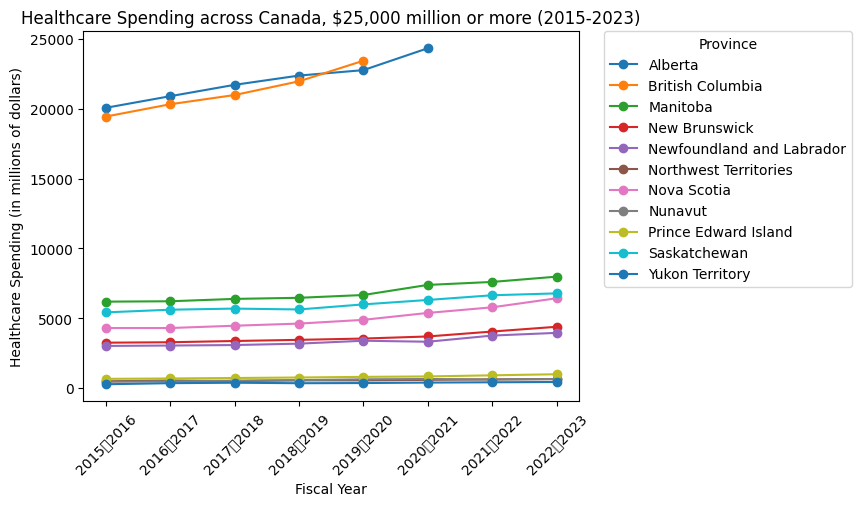

In [53]:
#Plot the data for low spending
spending_df1.plot(kind='line', marker='o')
plt.title('Healthcare Spending across Canada, $25,000 million or more (2015-2023)')
plt.xlabel('Fiscal Year')
plt.ylabel('Healthcare Spending (in millions of dollars)')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)  
plt.savefig(f"../Output/healthcare_spending_lessthan25k.png",bbox_inches='tight')
plt.show()

2.3 - Bar graphs created using pandas and matplotlib for risk factors.

2.4 - Linear regressions created using torch, sklearn, matplotlib and scipystats.
Graphs saved as images to the "Output" folder.

In [54]:
#merge the incidence datasets together for linear regression
merged_incidence_df = pd.merge(incidence_failure_final, incidence_ischemic_final, on=['Geography', 'Fiscal year'])
filtered_merged_incidence_df = pd.merge(merged_incidence_df, incidence_myocardial_final, on=['Geography', 'Fiscal year'])
filtered_merged_incidence_df

,Geography,Sex_x,Fiscal year,Counts_x,"Rate (per 100,000)_x",Sex_y,Counts_y,"Rate (per 100,000)_y",Sex,"Rate (per 100,000)",Counts
0,Canada,Both sexes,2015-2016,101185.0,544.0,Both sexes,159230.0,590.0,Both sexes,223.0,63975.0
1,Canada,Both sexes,2016-2017,101655.0,538.0,Both sexes,163110.0,596.0,Both sexes,227.0,66135.0
2,Canada,Both sexes,2017-2018,106765.0,557.0,Both sexes,163290.0,589.0,Both sexes,225.0,66565.0
3,Canada,Both sexes,2018-2019,109105.0,560.0,Both sexes,162255.0,576.0,Both sexes,224.0,67235.0
4,Canada,Both sexes,2019-2020,111030.0,560.0,Both sexes,166545.0,580.0,Both sexes,214.0,65210.0
...,...,...,...,...,...,...,...,...,...,...,...
107,Nunavut,Both sexes,2018-2019,60.0,512.0,Both sexes,65.0,266.0,Both sexes,120.0,30.0
108,Nunavut,Both sexes,2019-2020,55.0,468.0,Both sexes,70.0,288.0,Both sexes,101.0,25.0
109,Nunavut,Both sexes,2020-2021*,45.0,381.0,Both sexes,50.0,205.0,Both sexes,80.0,20.0
110,Nunavut,Both sexes,2021-2022*,60.0,496.0,Both sexes,80.0,324.0,Both sexes,159.0,40.0


In [55]:
#Clean up the merged dataset
columns_kept = ['Geography', 'Fiscal year', 'Counts_x', 'Counts_y', 'Counts']
filtered_merged_incidence_df = filtered_merged_incidence_df[columns_kept]

final_merged_incidence_df = filtered_merged_incidence_df.rename(columns={"Counts_x": "Counts for Heart Failure", "Counts_y": "Counts for Ischemic Heart Disease", 'Counts': 'Counts for Myocardial Infarction'})

merged_incidence_path = "final_merged_incidence_df.csv"
final_merged_incidence_df.to_csv(merged_incidence_path, index=False)

final_merged_incidence_df

,Geography,Fiscal year,Counts for Heart Failure,Counts for Ischemic Heart Disease,Counts for Myocardial Infarction
0,Canada,2015-2016,101185.0,159230.0,63975.0
1,Canada,2016-2017,101655.0,163110.0,66135.0
2,Canada,2017-2018,106765.0,163290.0,66565.0
3,Canada,2018-2019,109105.0,162255.0,67235.0
4,Canada,2019-2020,111030.0,166545.0,65210.0
...,...,...,...,...,...
107,Nunavut,2018-2019,60.0,65.0,30.0
108,Nunavut,2019-2020,55.0,70.0,25.0
109,Nunavut,2020-2021*,45.0,50.0,20.0
110,Nunavut,2021-2022*,60.0,80.0,40.0


In [56]:
#merge the mortality datasets together for linear regression
merged_mortality_df = pd.merge(mortality_failure_final, mortality_ischemic_final, on=['Geography', 'Fiscal year'])
filtered_merged_mortality_df = pd.merge(merged_mortality_df, mortality_myocardial_final, on=['Geography', 'Fiscal year'])
filtered_merged_mortality_df

,Geography,Sex_x,Fiscal year,Counts_x,"Rate (per 100,000)_x",Population_x,Sex_y,Counts_y,"Rate (per 100,000)_y",Population,Sex,Counts,Population_y,"Rate (per 100,000)"
0,Canada,Both sexes,2015-2016,82885.0,5588.0,713795.0,Both sexes,114955.0,1675.0,2478700.0,Both sexes,43490.0,638010.0,2770.0
1,Canada,Both sexes,2016-2017,86790.0,5586.0,730955.0,Both sexes,119735.0,1697.0,2521690.0,Both sexes,45420.0,659380.0,2810.0
2,Canada,Both sexes,2017-2018,89245.0,5616.0,749085.0,Both sexes,123290.0,1735.0,2559125.0,Both sexes,47665.0,679025.0,3205.0
3,Canada,Both sexes,2018-2019,89360.0,5561.0,767380.0,Both sexes,121610.0,1658.0,2592965.0,Both sexes,47740.0,697245.0,2856.0
4,Canada,Both sexes,2019-2020,90970.0,5526.0,787340.0,Both sexes,123315.0,1635.0,2632580.0,Both sexes,47860.0,713335.0,2607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Nunavut,Both sexes,2018-2019,40.0,8145.0,430.0,Both sexes,30.0,2871.0,760.0,Both sexes,0.0,0.0,0.0
108,Nunavut,Both sexes,2019-2020,25.0,5669.0,425.0,Both sexes,30.0,1951.0,775.0,Both sexes,0.0,0.0,0.0
109,Nunavut,Both sexes,2020-2021*,25.0,4002.0,435.0,Both sexes,0.0,0.0,NaN,Both sexes,0.0,0.0,0.0
110,Nunavut,Both sexes,2021-2022*,25.0,4694.0,455.0,Both sexes,30.0,2733.0,805.0,Both sexes,0.0,0.0,0.0


In [57]:
#Clean up the merged dataset
columns_kept = ['Geography', 'Fiscal year', 'Counts_x', 'Counts_y', 'Counts']
filtered_merged_mortality_df = filtered_merged_mortality_df[columns_kept]

final_merged_mortality_df = filtered_merged_incidence_df.rename(columns={"Counts_x": "Deaths for Heart Failure", "Counts_y": "Deaths for Ischemic Heart Disease", 'Counts': 'Deaths for Myocardial Infarction'})

merged_mortality_path = "final_merged_mortality_df.csv"
final_merged_mortality_df.to_csv(merged_mortality_path, index=False)

final_merged_mortality_df

,Geography,Fiscal year,Deaths for Heart Failure,Deaths for Ischemic Heart Disease,Deaths for Myocardial Infarction
0,Canada,2015-2016,101185.0,159230.0,63975.0
1,Canada,2016-2017,101655.0,163110.0,66135.0
2,Canada,2017-2018,106765.0,163290.0,66565.0
3,Canada,2018-2019,109105.0,162255.0,67235.0
4,Canada,2019-2020,111030.0,166545.0,65210.0
...,...,...,...,...,...
107,Nunavut,2018-2019,60.0,65.0,30.0
108,Nunavut,2019-2020,55.0,70.0,25.0
109,Nunavut,2020-2021*,45.0,50.0,20.0
110,Nunavut,2021-2022*,60.0,80.0,40.0


In [58]:
#Merge the incidence dataset with healthcare spending for linear regression
merged_incidence_spending_data = pd.merge(final_merged_incidence_df, healthcare_long, on=["Geography"], how="inner")
merged_incidence_spending_data

,Geography,Fiscal year_x,Counts for Heart Failure,Counts for Ischemic Heart Disease,Counts for Myocardial Infarction,Fiscal year_y,spending
0,Canada,2015-2016,101185.0,159230.0,63975.0,20152016,153017.2
1,Canada,2015-2016,101185.0,159230.0,63975.0,20162017,155633.1
2,Canada,2015-2016,101185.0,159230.0,63975.0,20172018,162162.9
3,Canada,2015-2016,101185.0,159230.0,63975.0,20182019,168746.6
4,Canada,2015-2016,101185.0,159230.0,63975.0,20192020,176420.2
...,...,...,...,...,...,...,...
891,Nunavut,2022-2023*,65.0,70.0,35.0,20182019,562.5
892,Nunavut,2022-2023*,65.0,70.0,35.0,20192020,621.9
893,Nunavut,2022-2023*,65.0,70.0,35.0,20202021,645.2
894,Nunavut,2022-2023*,65.0,70.0,35.0,20212022,605.6


In [59]:
#Normalize columns for PyTorch linear regression method
cols_to_normalize = ["spending", "Counts for Heart Failure", "Counts for Ischemic Heart Disease", "Counts for Myocardial Infarction"]

scaler = StandardScaler()
merged_incidence_spending_data[cols_to_normalize] = scaler.fit_transform(merged_incidence_spending_data[cols_to_normalize])

print("Normalized data:")
print(merged_incidence_spending_data.head())

Normalized data:
  Geography Fiscal year_x  Counts for Heart Failure  \
0    Canada     2015-2016                  3.011858   
1    Canada     2015-2016                  3.011858   
2    Canada     2015-2016                  3.011858   
3    Canada     2015-2016                  3.011858   
4    Canada     2015-2016                  3.011858   

   Counts for Ischemic Heart Disease  Counts for Myocardial Infarction  \
0                           3.217642                           3.24087   
1                           3.217642                           3.24087   
2                           3.217642                           3.24087   
3                           3.217642                           3.24087   
4                           3.217642                           3.24087   

  Fiscal year_y  spending  
0     20152016  2.667455  
1     20162017  2.722378  
2     20172018  2.859477  
3     20182019  2.997708  
4     20192020  3.158823  


In [60]:
#Input tensor (spending)
X = torch.tensor(merged_incidence_spending_data["spending"].values, dtype=torch.float32).unsqueeze(1)

#Output tensor (incidence rates)
y = torch.tensor(merged_incidence_spending_data[["Counts for Heart Failure", "Counts for Ischemic Heart Disease", "Counts for Myocardial Infarction"]].values, dtype=torch.float32)

In [61]:
#Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

#Model for single input (spending) and 3 outputs (diseases)
model = LinearRegressionModel(input_dim=1, output_dim=3)

In [62]:
#Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [63]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.4291
Epoch [200/1000], Loss: 0.1073
Epoch [300/1000], Loss: 0.0412
Epoch [400/1000], Loss: 0.0327
Epoch [500/1000], Loss: 0.0320
Epoch [600/1000], Loss: 0.0320
Epoch [700/1000], Loss: 0.0320
Epoch [800/1000], Loss: 0.0320
Epoch [900/1000], Loss: 0.0320
Epoch [1000/1000], Loss: 0.0320


In [64]:
import numpy as np

predictions = model(X).detach().cpu().tolist()
print("Predictions:")
print(predictions)

Predictions:
[[2.624769926071167, 2.630281925201416, 2.618236780166626], [2.678814172744751, 2.6844398975372314, 2.672146797180176], [2.8137197494506836, 2.8196284770965576, 2.8067164421081543], [2.9497387409210205, 2.9559333324432373, 2.942396879196167], [3.1082749366760254, 3.114802360534668, 3.100538492202759], [3.669525384902954, 3.677231550216675, 3.6603920459747314], [3.9045677185058594, 3.9127676486968994, 3.8948493003845215], [4.005468845367432, 4.013880729675293, 3.995499610900879], [2.624769926071167, 2.630281925201416, 2.618236780166626], [2.678814172744751, 2.6844398975372314, 2.672146797180176], [2.8137197494506836, 2.8196284770965576, 2.8067164421081543], [2.9497387409210205, 2.9559333324432373, 2.942396879196167], [3.1082749366760254, 3.114802360534668, 3.100538492202759], [3.669525384902954, 3.677231550216675, 3.6603920459747314], [3.9045677185058594, 3.9127676486968994, 3.8948493003845215], [4.005468845367432, 4.013880729675293, 3.995499610900879], [2.624769926071167, 

In [65]:
# Ensure predictions is a NumPy array
predictions = np.array(predictions)

In [66]:
from scipy.stats import pearsonr

for i, disease in enumerate(["Counts for Heart Failure", "Counts for Ischemic Heart Disease", "Counts for Myocardial Infarction"]):
    corr, _ = pearsonr(merged_incidence_spending_data["spending"], merged_incidence_spending_data[disease])
    print(f"Correlation between spending and {disease}: {corr:.4f}")

Correlation between spending and Counts for Heart Failure: 0.9840
Correlation between spending and Counts for Ischemic Heart Disease: 0.9861
Correlation between spending and Counts for Myocardial Infarction: 0.9815


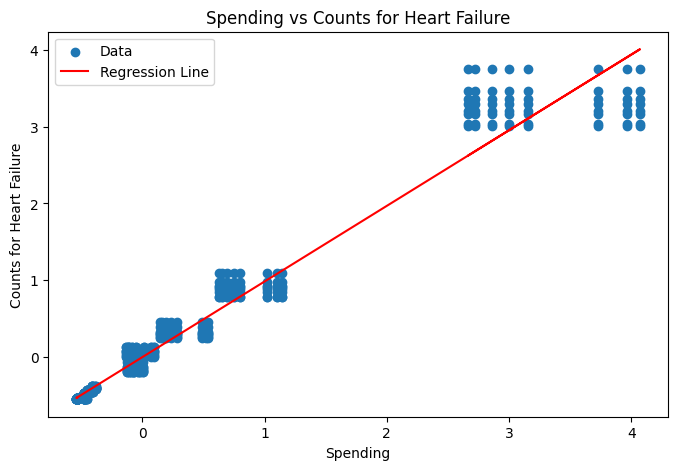

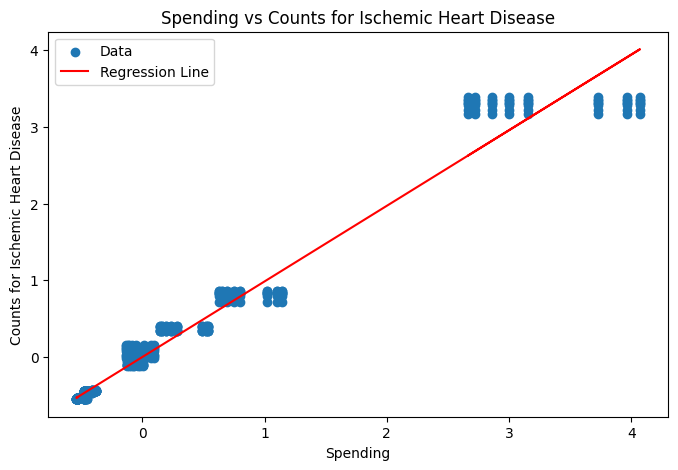

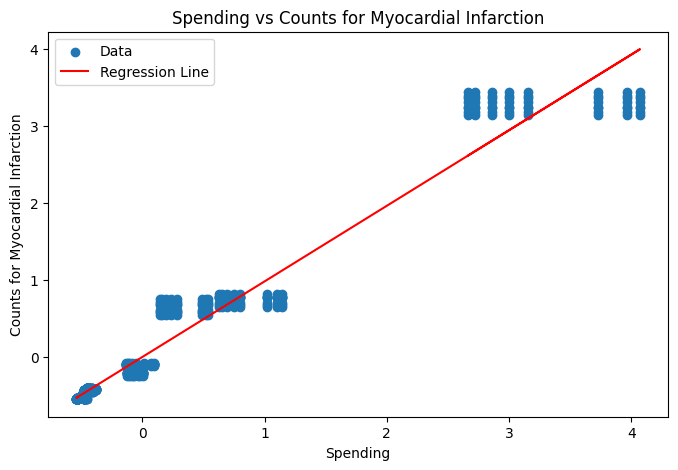

In [67]:
import matplotlib.pyplot as plt

for i, disease in enumerate(["Counts for Heart Failure", "Counts for Ischemic Heart Disease", "Counts for Myocardial Infarction"]):
    plt.figure(figsize=(8, 5))
    plt.scatter(merged_incidence_spending_data["spending"], merged_incidence_spending_data[disease], label="Data")
    plt.plot(merged_incidence_spending_data["spending"], predictions[:, i], color="red", label="Regression Line")
    plt.title(f"Spending vs {disease}")
    plt.xlabel("Spending")
    plt.ylabel(disease)
    plt.legend()
    plt.show()

As can be seen from the code above, the correlation values are as follows: 0.984 for heart failure and healthcare spending, 0.986 for ischemic heart disease and healthcare spending, and 0.982 for myocardial infarction and healthcare spending. These are very strong values across the board. Thus, it can be said that there is in fact a strong positive correlation between healthcare spending and incidence rates.